### importing important Libraries

In [100]:
#numpy is used for mathematical work in python using arrays and all
import numpy as np 
# pandas is used for data analysis in python
import pandas as pd 
# to interact with system enviorenment
import os
# to plot graphs and all in python
import matplotlib.pyplot as plt
# to work in regex functions in python
import re
%matplotlib inline

# to done natural language processing in python
!pip install nltk
import nltk
# to remove stopwords from the text
from nltk.corpus import stopwords
from nltk import PorterStemmer

# to plot wordcloud based on frequency of words
!pip install wordcloud
from wordcloud import WordCloud

#this is a tweet preprocessor designed for preprocessing the tweets
!pip install tweet-preprocessor
import preprocessor as p

from gensim.models import KeyedVectors

# the following imports are for text preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

#for splitting the dataset into train and test dataset
from sklearn.model_selection import train_test_split
# For calculating Term-frequency 
from sklearn.feature_extraction.text import TfidfVectorizer
#importing different algorithm models to train our data
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
#For calculating accuracy score and performance analysis of a model
from sklearn.metrics import accuracy_score, classification_report

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### Defining encoding type and column names

In [22]:
#Encoding type is how the document is encoded such as utf-8 latin-1 for us its ISO-8859-1
encoding = 'ISO-8859-1'
#The following are the column names of the dataset
#Target wheter the tweet is positive or negative ir neutral
#id- The id of the tweet
# date - the date of the tweet has been posted
# user - name or user handle
# text - tweet itself that we will use for our analysis
col_names = ['target', 'id', 'date', 'flag', 'user', 'text']
#Reading the csv file
dataset = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding=encoding, names=col_names)

##### getting the data table

In [23]:
#Showing the dataset
dataset.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [24]:
import copy
#copying main dataset for eda dataset as eda_df
eda_df = copy.deepcopy(dataset)

In [25]:
#getting positive data for eda
eda_pos_df = eda_df[eda_df.target == 4].iloc[:80000, :]
#getting negative data for eda
eda_neg_df = eda_df[eda_df.target == 0].iloc[:80000, :]
#creating dataframe combining
eda_sub_data = pd.concat([eda_pos_df, eda_neg_df], axis = 0)

#### boxplotting for checking if anything stands outside without 0 and 4

Boxplotting targeting to check if there is any outliers..


<AxesSubplot:>

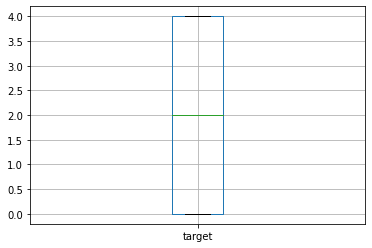

In [26]:
print('Boxplotting targeting to check if there is any outliers..')
# we use boxplot for checking that wheter the values we have such as 0 for negative 4 for positive has anyother value lets say 5 or not
eda_sub_data.boxplot(column='target')

#### creating a table to check which date is having which target value

In [27]:
#Creating a dictionary that we will convert into dataframe for for further analysis
date_target_data = {'target': eda_df.target, 'date': eda_df['date']}
date_target_df = pd.DataFrame(date_target_data)
#Showing the new date dataframe
date_target_df.head()

,target,date
0,0,Mon Apr 06 22:19:45 PDT 2009
1,0,Mon Apr 06 22:19:49 PDT 2009
2,0,Mon Apr 06 22:19:53 PDT 2009
3,0,Mon Apr 06 22:19:57 PDT 2009
4,0,Mon Apr 06 22:19:57 PDT 2009


In [28]:
#Converting date time object to date-time-datatype
date_target_df['date'] = pd.to_datetime(date_target_df['date'])

/home/dingo/.local/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


#### Plotting hour chart to check at which time which type of post is done

In [29]:
#Plotting hour table to check when positive and negative type tweet is post
#Creating a hour list for hours in the date in the previously created dataframe in above cell
hour = [ date_target_df['date'][i].hour for i in range(len(date_target_df['date'])) ]
# creating a new column in the newly made dataframe named hour 
date_target_df['hour'] = hour
print('Hour Chart')
#Showing the hour chart
date_target_df.head()

Hour Chart


,target,date,hour
0,0,2009-04-06 22:19:45,22
1,0,2009-04-06 22:19:49,22
2,0,2009-04-06 22:19:53,22
3,0,2009-04-06 22:19:57,22
4,0,2009-04-06 22:19:57,22


In [30]:
#Converting 3 types of target hour into 24hrs format
hour_data = {'0': [0]*24, '2': [0]*24, '4': [0]*24}
#converting the target type to string and hour from date and time format to integer format and adding them into the hour_data dictionary to get the frequency of when which type of tweets are posted
for i in range(len(date_target_df['hour'])):
    target = str(date_target_df['target'][i])
    hour = int(date_target_df['hour'][i])
    hour_data[target][hour] += 1

#### Preprocessing the data for Plotting line chart in basis of timing i.e. number of positive, neutral, negative type of target posted at what time

In [31]:
#Creating list datatype store hour data to plot
#Creating a list of lists that contains all the values from the above dictionary we will plot in further
hour_data = [hour_data['0'], hour_data['2'], hour_data['4']]
hour_data = list(map(list, zip(*hour_data)))

In [32]:
#Converting the hour data into a DataFrame
type_df = pd.DataFrame(hour_data, index = [i for i in range(24)], columns=['negative', 'neutral', 'positive'])

Plotting positive, negative, neutral on basis of time


Text(0, 0.5, 'Count of Tweets')

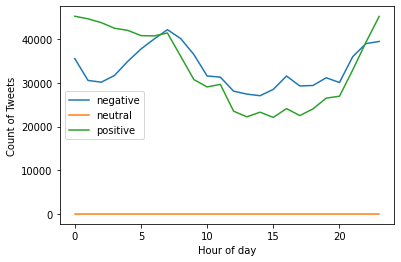

In [33]:
print('Plotting positive, negative, neutral on basis of time')
ax = type_df.plot()
#Giving the x axis name for the plot
ax.set_xlabel("Hour of day")
#giving the y axis name for the plot
ax.set_ylabel("Count of Tweets")

# Preprocessing

### we will take data from the first csv for non-depressing tweets and later we will merge them with depressive tweets

In [70]:
#Copying dataset and taking 8000 from the main dataset so that the dataset doesnt get biased
df = dataset.copy().sample(8000, random_state=42)
#giving them label of 0 as non-depressive
df['label'] = 0
# creating dataframe with text and label only
df = df[['text', 'label']]
#Dropping nan 
df.dropna(inplace=True)
df.head()

,text,label
541200,@chrishasboobs AHHH I HOPE YOUR OK!!!,0
750,"@misstoriblack cool , i have no tweet apps fo...",0
766711,@TiannaChaos i know just family drama. its la...,0
285055,School email won't open and I have geography ...,0
705995,upper airways problem,0


In [40]:
#Importing Depressive tweets for merging them with the other one
col_names = ['id', 'text']
depressive_data = pd.read_csv('depressive_tweets_processed.csv', sep = '|', header = None, usecols = [0,5], nrows = 3200, names=col_names)

In [41]:
#just naming depressive_data as df2 for ease of working
df2 = depressive_data

In [42]:
# informatio of the newly got dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2345 non-null   object
 1   text    2313 non-null   object
dtypes: object(2)
memory usage: 36.8+ KB


##### as the new data contains depressive tweets we will give them a label of 1

In [71]:
#Creating a new column name label for the depressed tweet and numbering them as 1
df2['label'] = 1
# creating a dataframe that only  contains the text and the label column of the previous dataframe
df2 = df2[['text', 'label']]
# showing that dataset
df2.head()

/tmp/ipykernel_8113/1437536040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['label'] = 1


,text,label
0,The lack of this understanding is a small but ...,1
1,i just told my parents about my depression and...,1
2,depression is something i don't speak about ev...,1
3,Made myself a tortilla filled with pb&j. My de...,1
4,@WorldofOutlaws I am gonna need depression med...,1


In [73]:
#Concatinating means merging both the dataset into 1 new dataset
main_df = pd.concat([df, df2], axis=0) # Merging the normal and depressive tweets
main_df.shape

(10345, 2)

In [75]:
# main dataframe information checking
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10345 entries, 541200 to 2344
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10313 non-null  object
 1   label   10345 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 242.5+ KB


#### including Contraction data

In [76]:
#Reading the contractioned json that we will use for expand the contracted words
contractions = pd.read_json('contraction.json', typ = 'series')
# converting the dataframe into dictionary as we will work with the data inside the dictionary
contractions = contractions.to_dict()

In [77]:
# Defining the function to expand contractions from the tweets
#Creating a collection of contraction words those are stored inside the contractions dictionary
c_re = re.compile('(%s)' % '|'.join(contractions.keys()))
#Function for expanding contractions
def expandContractions(text, c_re = c_re):
    #Replacing function for replacing the contracted words with the actual length word
    def replace(match):
        return contractions[match.group(0)]
    return c_re.sub(replace, text)

In [79]:
#Cleaning Tweets
#Creaiting bad symbol collections that are not nessecary
BAD_SYMBOLS_RE = re.compile('[^0-9a-z#+_]')

#Defining clean function
def clean_tweets(tweets):
    cleaned_tweets = []
    for tweet in tweets:
        #Converting the tweets into string
        tweet = str(tweet)
        #Loweing the tweets if there are any upper case letter
        tweet = tweet.lower()
        #replacing the bad symbols we defined from the tweet with an whitespace
        tweet = BAD_SYMBOLS_RE.sub(' ', tweet)
        #cleaning using tweet preprocessing
        tweet = p.clean(tweet)
        
        #expand contraction
        tweet = expandContractions(tweet)

        #remove punctuation
        tweet = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet).split())

        #Defining all the stopwords
        stop_words = set(stopwords.words('english'))
        #Defining the word tokenizer we will use 
        word_tokens = nltk.word_tokenize(tweet) 
        # removing stopwords from the tokenized words
        filtered_sentence = [w for w in word_tokens if not w in stop_words]
        tweet = ' '.join(filtered_sentence)
        
        cleaned_tweets.append(tweet)
        
    return cleaned_tweets

In [80]:
#Creating a new list of tweets those are cleaned
X = clean_tweets([tweet for tweet in main_df['text']])

#### Plotting Word in the word cloud|

In [81]:
#Plotting depressive tweets in the word cloud for checking the most depressive words in the tweets
#getting text from depressed dataset
depressive_tweets = [clean_tweets([t for t in df2['text']])]
# creating a string of words present in the depressive tweets
depressive_words = ' '.join(list(map(str, depressive_tweets)))
# Plotting a word clous based on the words
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)

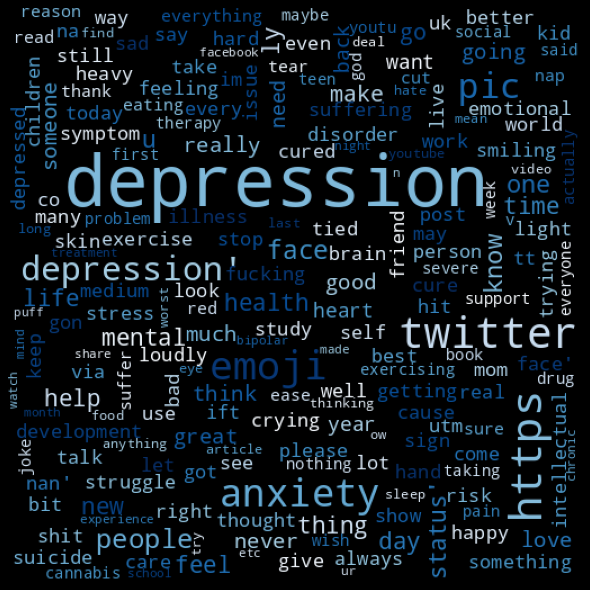

In [82]:
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [83]:
# Similarly Plotting normal words in the word cloud
non_depressive_tweets = [clean_tweets([t for t in df['text']])]
non_depressive_words = ' '.join(list(map(str, non_depressive_tweets)))
non_depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(non_depressive_words)

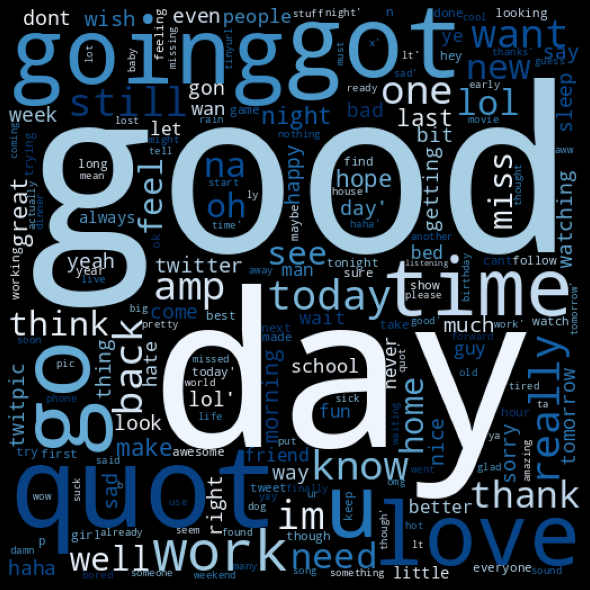

In [84]:
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(non_depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

##### Tokenization of the text

In [85]:
# defining maximum number of words
MAX_NUM_WORDS = 10000
# creating the tokenizer woth max num words to work on text intest
tokenizer= Tokenizer(num_words=MAX_NUM_WORDS)
#passing the tokenizer on the text so that they can tokenize on a uniform size of words that is 10000 so that there will be no collision in model regarding shape mismatch
tokenizer.fit_on_texts(X)

In [87]:
#COnverting the tokenized text into word vectors
word_vector = tokenizer.texts_to_sequences(X)

In [88]:
#Getting the word index list
word_index = tokenizer.word_index

In [89]:
#Defning the vocabulary size
vocab_size = len(word_index)
vocab_size   # num of unique tokens

20670

In [90]:
#Getting the max seq length
MAX_SEQ_LENGTH = 140
#Applying thr pad sequencer to match a uniform length of 140 for all text to pass in the machine learning model
input_tensor = pad_sequences(word_vector, maxlen=MAX_SEQ_LENGTH)

In [91]:
input_tensor.shape

(10345, 140)

In [92]:
#Creating the corus of text that we will pass on the main dataframe the we created by combining both the datasets and converting them into vectors by calculating their term frequency and inverse document frequency with a limited length known as features to be passed inside the model 
corpus = main_df['text'].values.astype('U')
tfidf = TfidfVectorizer(max_features = MAX_NUM_WORDS) 
#creating tfidf tensor by fitting them in the corpus we created
tdidf_tensor = tfidf.fit_transform(corpus)

In [93]:
tdidf_tensor.shape

(10345, 10000)

In [94]:
#Creating train and test dataset
x_train, x_test, y_train, y_test = train_test_split(tdidf_tensor, main_df['label'].values, test_size=0.3)

#### Checking first model as Support Vector Machine

In [95]:
#Defining the first model
baseline_model = SVC()
#Train the models
baseline_model.fit(x_train, y_train)

SVC()

In [96]:
#get prediction from the model
predictions = baseline_model.predict(x_test)

In [97]:
#Get the accuracy score of the model
accuracy_score(y_test, predictions)

0.9948453608247423

In [98]:
# get the precision recall f1 support score means overall performance of the model
print(classification_report(y_test, predictions, digits=5))


              precision    recall  f1-score   support

           0    0.99374   0.99958   0.99665      2383
           1    0.99859   0.97920   0.98880       721

    accuracy                        0.99485      3104
   macro avg    0.99616   0.98939   0.99272      3104
weighted avg    0.99487   0.99485   0.99483      3104



#### Checking Second Baseline model as Logistic Regression

In [101]:
baseline_model2 = LogisticRegression()
baseline_model2.fit(x_train, y_train)

LogisticRegression()

In [102]:
predictions = baseline_model2.predict(x_test)
print(classification_report(y_test, predictions, digits=5))

              precision    recall  f1-score   support

           0    0.97463   0.99958   0.98695      2383
           1    0.99848   0.91401   0.95438       721

    accuracy                        0.97970      3104
   macro avg    0.98656   0.95679   0.97066      3104
weighted avg    0.98017   0.97970   0.97938      3104



#### checing the third model as Random Forest Classifier

In [103]:
baseline_model3 = RandomForestClassifier()
baseline_model3.fit(x_train, y_train)
predictions = baseline_model3.predict(x_test)
print(classification_report(y_test, predictions, digits=5))

              precision    recall  f1-score   support

           0    0.99749   0.99958   0.99853      2383
           1    0.99860   0.99168   0.99513       721

    accuracy                        0.99774      3104
   macro avg    0.99805   0.99563   0.99683      3104
weighted avg    0.99775   0.99774   0.99774      3104



#### Checking 4th classifier as Decition Tree Classifier

In [104]:
baseline_model4 = DecisionTreeClassifier()
baseline_model4.fit(x_train, y_train)
predictions = baseline_model4.predict(x_test)
print(classification_report(y_test, predictions, digits=5))

              precision    recall  f1-score   support

           0    0.99748   0.99790   0.99769      2383
           1    0.99306   0.99168   0.99237       721

    accuracy                        0.99646      3104
   macro avg    0.99527   0.99479   0.99503      3104
weighted avg    0.99645   0.99646   0.99646      3104



#### Checking the 5th model as MLPClassifier

In [106]:
baseline_model5 = DecisionTreeClassifier()
baseline_model5.fit(x_train, y_train)
predictions = baseline_model5.predict(x_test)
print(classification_report(y_test, predictions, digits=5))

              precision    recall  f1-score   support

           0    0.99832   0.99748   0.99790      2383
           1    0.99170   0.99445   0.99307       721

    accuracy                        0.99678      3104
   macro avg    0.99501   0.99597   0.99549      3104
weighted avg    0.99678   0.99678   0.99678      3104



#### the 6th model we will check is Ridge linear classifier

In [107]:
baseline_model6 = LogisticRegression(penalty='l2')
baseline_model6.fit(x_train, y_train)
predictions=baseline_model6.predict(x_test)
print(classification_report(y_test, predictions, digits=5))

              precision    recall  f1-score   support

           0    0.97463   0.99958   0.98695      2383
           1    0.99848   0.91401   0.95438       721

    accuracy                        0.97970      3104
   macro avg    0.98656   0.95679   0.97066      3104
weighted avg    0.98017   0.97970   0.97938      3104

